# MEAN SHIFT

# Setup
Let us import the required modules.

In [1]:
from src.utilities.dataset import load_data
from src.models.clustering import MeanShiftEvaluation
from src.utilities.plot_clusters import DataClusterSplit

## Load Data


In [2]:
data = load_data(reduced=True)
data

Loading /Users/a/GitHub/clustering/src/data/red_x_pixels.csv
Loading /Users/a/GitHub/clustering/src/data/red_y_labels.csv


[Length: 14000; Features: 784]

## Tuning

In [3]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10, 15, 25, 50, 100, 150, 200],
    hyperparam_vals=[0.1, 0.3, 0.5, 0.7, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0]
)

In [4]:
mean_shift_evaluation.load_results()

Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_result_bestmodels.json
Loading /Users/a/GitHub/clustering/src/results/MeanShift_bandwidth_bestmodel.pkl


In [ ]:
%%time
# mean_shift_evaluation.evaluate()

## Results

In [5]:
mean_shift_evaluation.results()

{'2': {'0.1': {'score': 0.6568509383323299,
   'n_clusters': 3,
   'time': 238.3003787},
  '0.3': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 127.04494401200009},
  '0.5': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 33.135404765999965},
  '0.7': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 23.933955089999927},
  '1.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 27.120417809999935},
  '2.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 29.252734922999934},
  '5.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 17.082216864999964},
  '10.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 18.475796326000136},
  '25.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 20.83126715100002},
  '50.0': {'score': 0.10026692722949598,
   'n_clusters': 1,
   'time': 24.105510518999836}},
 '5': {'0.1': {'score': 0.9047771065280173,
   'n_clusters': 1220,
   'time': 93

In [6]:
mean_shift_evaluation.results_bestmodels()

{'2': {'bandwidth': 0.1,
  'score': 0.6568509383323299,
  'n_clusters': 3,
  'time': 238.3003787},
 '5': {'bandwidth': 0.1,
  'score': 0.9047771065280173,
  'n_clusters': 1220,
  'time': 93.14571683200006},
 '10': {'bandwidth': 0.1,
  'score': 0.9001699917341035,
  'n_clusters': 11895,
  'time': 49.90217578900001},
 '15': {'bandwidth': 0.3,
  'score': 0.9052421601542967,
  'n_clusters': 1534,
  'time': 136.38603115199976},
 '25': {'bandwidth': 0.3,
  'score': 0.9018374475727858,
  'n_clusters': 9193,
  'time': 74.58572878899986},
 '50': {'bandwidth': 0.7,
  'score': 0.9030066637412877,
  'n_clusters': 2803,
  'time': 197.5751598869997},
 '100': {'bandwidth': 0.7,
  'score': 0.9035212923372078,
  'n_clusters': 11640,
  'time': 196.13816828200015},
 '150': {'bandwidth': 1.0,
  'score': 0.9094231016501179,
  'n_clusters': 11125,
  'time': 207.4217698350003},
 '200': {'bandwidth': 1.0,
  'score': 0.9031232843162267,
  'n_clusters': 12580,
  'time': 215.2481676110001}}

In [7]:
mean_shift_evaluation.best_model()

{'model': MeanShift(bandwidth=1.0, n_jobs=-1),
 'n_components': 150,
 'bandwidth': 1.0,
 'score': 0.9094231016501179,
 'n_clusters': 11125,
 'time': 207.4217698350003}

## Plots

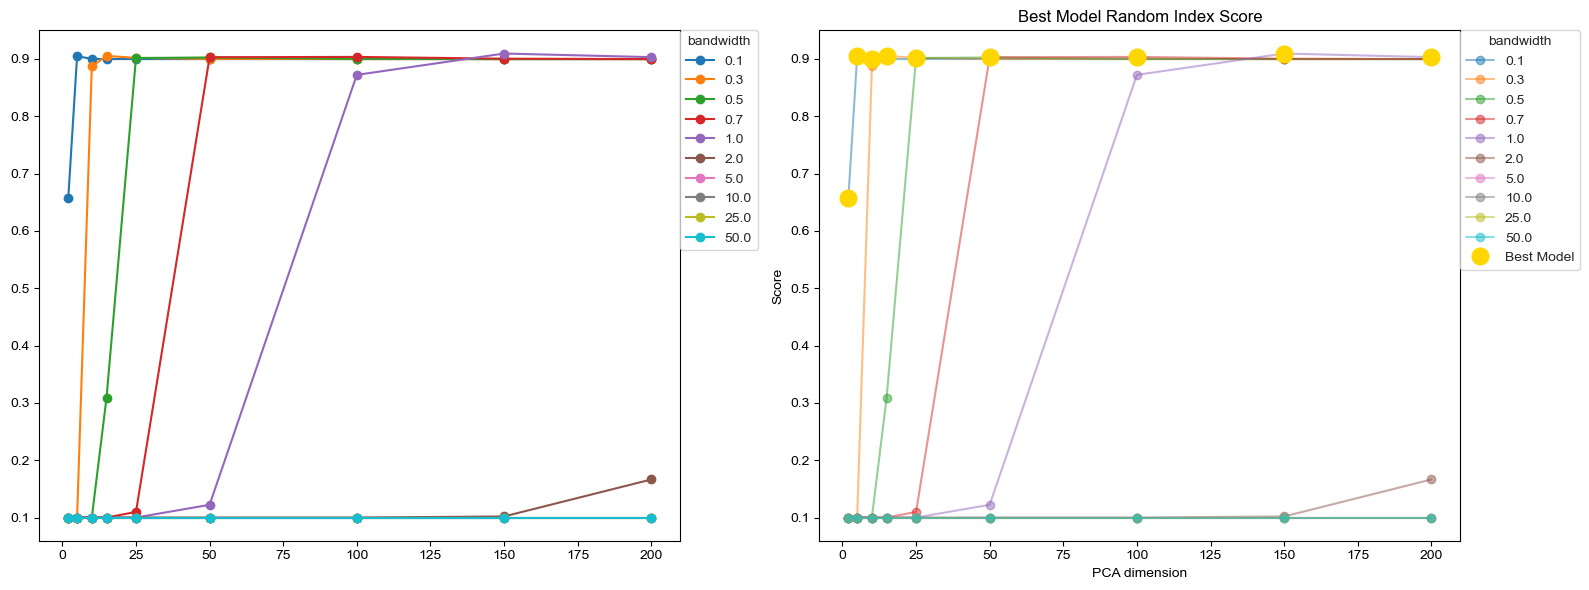

In [8]:
mean_shift_evaluation.plot_score_with_highlight(save=True)

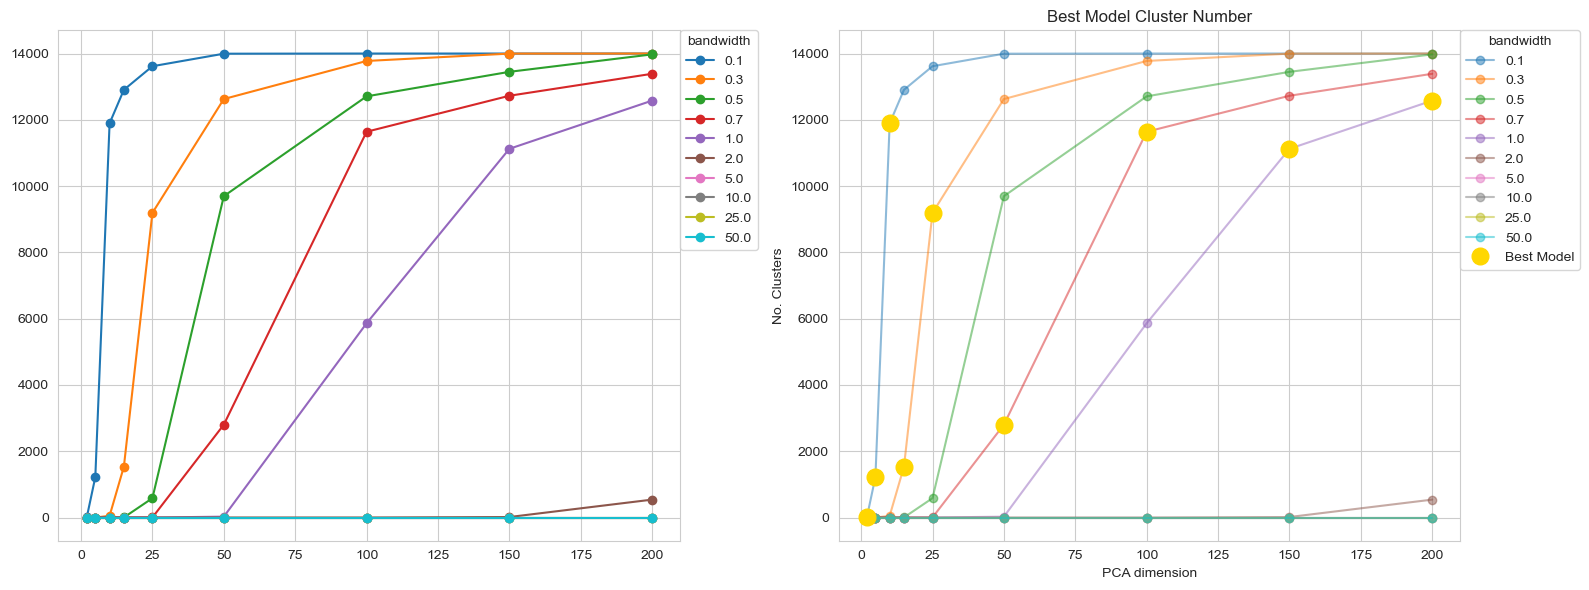

In [6]:
mean_shift_evaluation.plot_n_clusters_with_highlight(save=True)

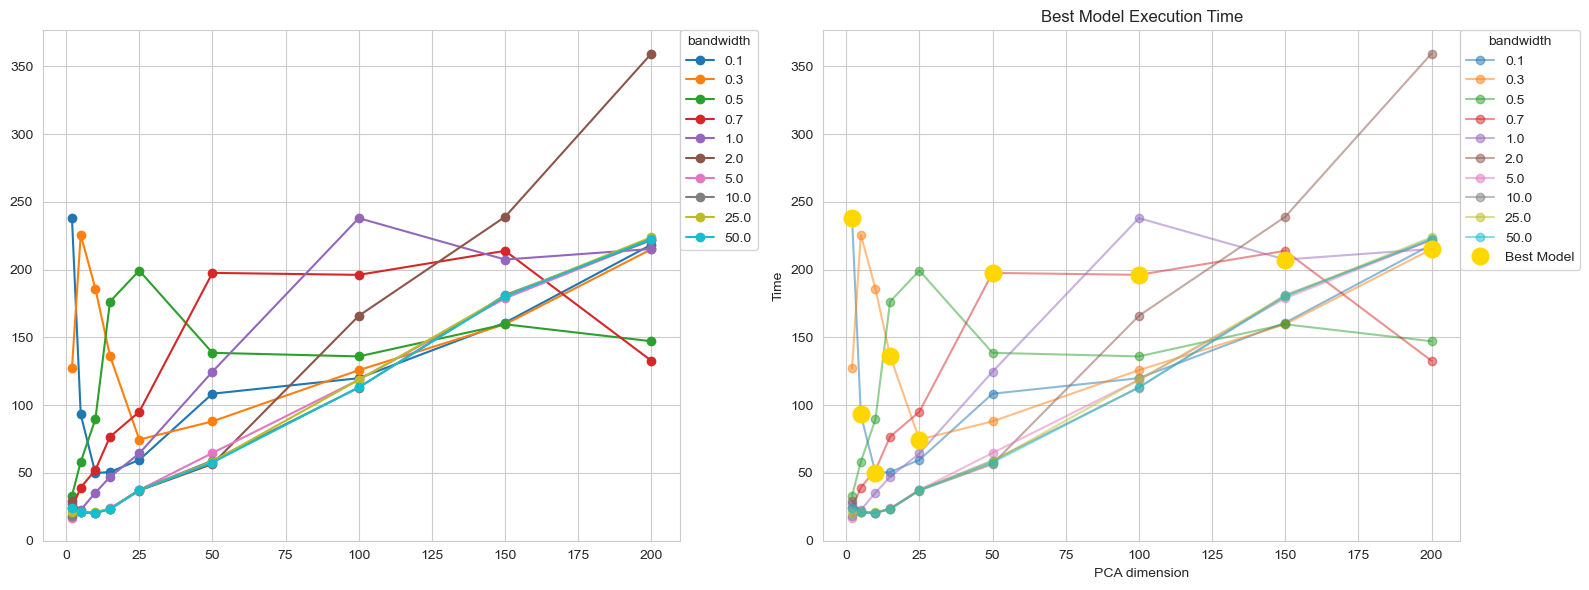

In [7]:
mean_shift_evaluation.plot_time_with_highlight(save=True)

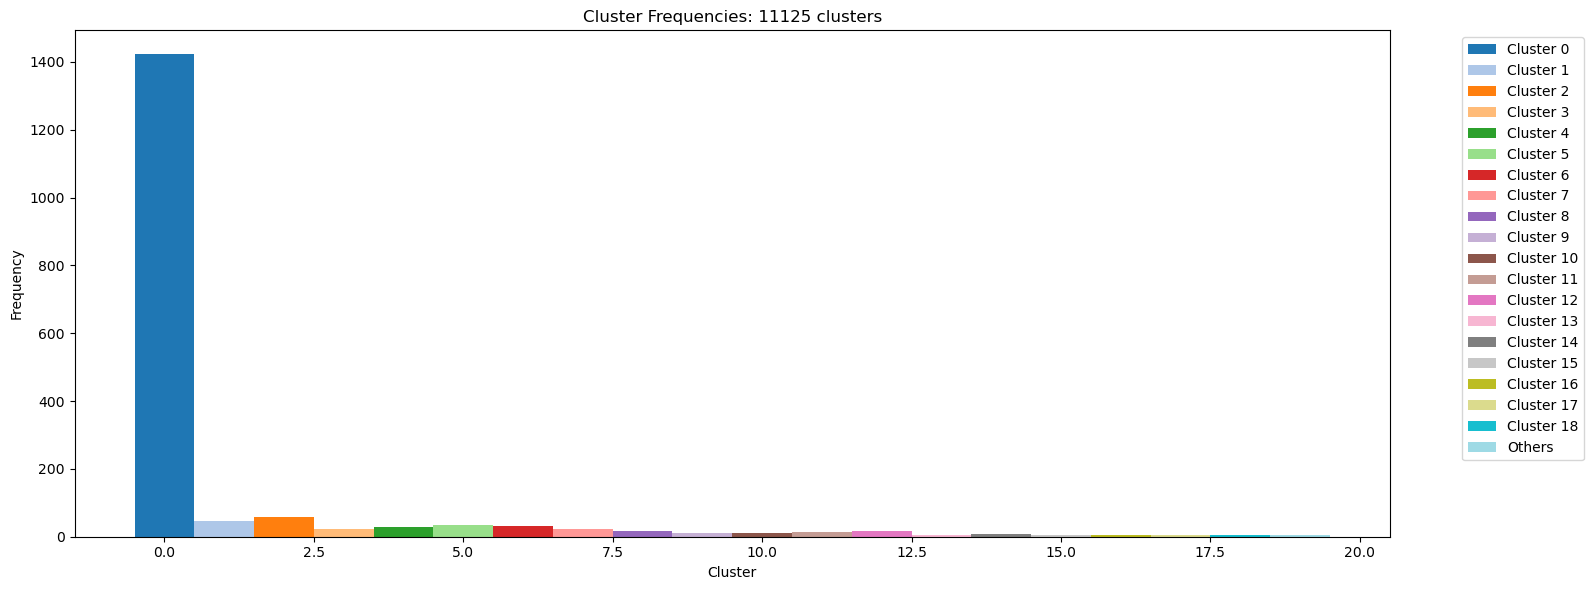

In [5]:
from src.models.clustering import plot_cluster_frequencies

plot_cluster_frequencies(data=data, model_name=mean_shift_evaluation.model_name, best_model_info=mean_shift_evaluation.best_model())

## Best model

In [7]:
best = mean_shift_evaluation.best_model()
best.out

AttributeError: 'dict' object has no attribute 'out'

In [ ]:
# match self.model_name:
#     case "GaussianMixture":
#         labels = best_model.predict(data.x)
#         n_clusters_ = best_model.get_params()["n_components"]
#     cluster_centers = best_model.means_
#     case "MeanShift":
#         labels = best_model.labels_
#         n_clusters_ = len(np.unique(labels))
#     cluster_centers = best_model.cluster_centers_
#     case "NormalizedCut":
#         labels = best_model.labels_
#         n_clusters_ = best_model.get_params()["n_clusters"]
#         cluster_centers = None

In [6]:
clusters = DataClusterSplit(data=data, index=best.out)

In [7]:
clusters

ClusterDataSplit [Data: 14000, Clusters: 6054, Mean-per-Cluster: 2.313, Score: 0.906] 

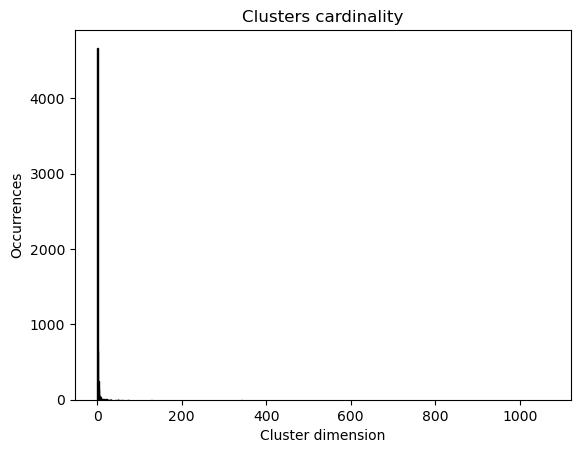

In [8]:
clusters.plot_frequencies_histo()

In [9]:
clusters_best = clusters.get_sub_clusters(a=25)

In [10]:
clusters_best

ClusterDataSplit [Data: 4187, Clusters: 49, Mean-per-Cluster: 85.449, Score: 0.887] 

In [11]:
clusters_best.rand_index_score

0.8868416347051045

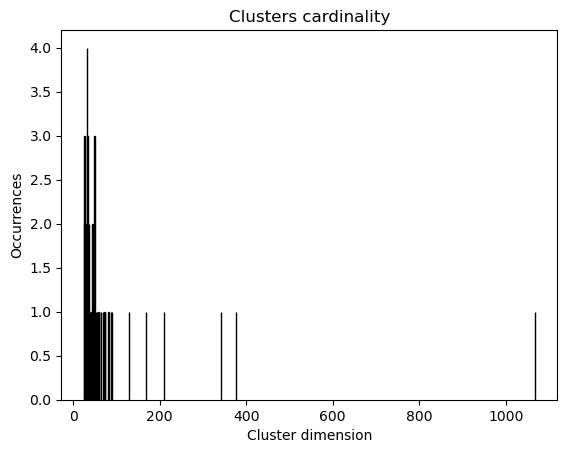

In [12]:
clusters_best.plot_frequencies_histo()

In [ ]:
clusters_best.plot_mean_digit()
# output stra lunghi porcodio

In [14]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [15]:
clusters_bad

ClusterDataSplit [Data: 4669, Clusters: 4669, Mean-per-Cluster: 1.000, Score: 0.854] 

In [ ]:
clusters_bad.plot_mean_digit(sample_out=500)
# output stra lunghi porcodio